<a href="https://colab.research.google.com/github/leonardo-91/sistemas-inteligentes/blob/main/Proyecto_Final_Sistemas_Inteligentes_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pontifica Universidad Javeriana**

Sistemas Inteligentes


---



**Grupo:**

1.   Edison Leonardo Neira Espitia
2.   Sergio Rairan
3.   Sebastian Herrara




---





# **Sistema inteligente para la segmentación de clientes con el fin de potencializar y optimizar la conversión de la campaña deposito financiero**



---



# **Contexto**

Una institución bancaria portuguesa, propone a través de una campaña de marketing basada en llamadas telefónica, predecir si un usuario se suscribirá a un depósito a plazos. De cada usuario intentan saber atributos como el trabajo actual, el nivel de educación, el incumplimiento financiero, etc. Actualmente, la institución realiza las llamadas sin clasificar ni priorizar clientes, como consecuencia se tiene un tiempo elevado en la labor e incomodidad en clientes que no cumplan con el perfil.



## **Objetivo**

Aumentar el número de clientes que se suscriben y al mismo tiempo eficientar la operación de la campaña de depósito financiero (CDT) a partir de estrategias orientadas a la conversión de usuarios usando cuatro técnicas de IA utilizando datos de los años 2012 - 2014 con un nivel mínimo de precisión del 80% de conversión, buscando ampliar el recaudo financiero para la compañía (Banco), posibilitando el aumento del índice de inversión y por ende el aumento de las utilidades. Esperamos analizar estos cuatro tipos de técnicas de IA por medio de Google Colabs usando Python 3.7 como leguaje de programación, y Scikit-Learn como librería de apoyo para la implementación de los diferentes algoritmos, a su vez usaremos el set de datos públicos de una institución financiera de Portugal que se encuentra alojado en Center of Machine Learning  and Intellignet system (UCI), tenemos como objetivo desarrollar este análisis en el transcurso del curso que se estima será de 3 meses.  



---



## **Desarrollo**

In [1]:
!python --version

Python 3.7.13


Instalamos libreria para usar **Fuzzy** sobre python usando la libreria **scikit-fuzzy**

In [2]:
!pip install scikit-fuzzy

**Librerías**

In [3]:
import numpy as np
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

**Matriz de confusión**

In [4]:
def list_cm(cm,classes):     #función para generar de una forma más visual la matriz de confusión
    if len(cm)==2:
      cm.astype(int)
      row_0 =['','Valor','Verdadero']
      row_1 =['-',classes[0],classes[1]]
      row_2 =[classes[0],cm[0,0],cm[1,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1]]
      table = zip(row_0,row_1, row_2, row_3)
      headers = ['', '', 'Valor', 'Predicho']  
      return print(tabulate(table, headers=headers, floatfmt=".0f"))
    else:
      cm.astype(int)
      row_0 =['','Valor','Verdadero','']
      row_1 =['-',classes[0],classes[1],classes[2]]
      row_2 =[classes[0],cm[0,0],cm[1,0],cm[2,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1],cm[2,1]]
      row_4 =[classes[2],cm[0,2],cm[1,2],cm[2,2]]
      table = zip(row_0,row_1, row_2, row_3, row_4)
      headers = ['', '', 'Valor', 'Predicho', '']  
      return print(tabulate(table, headers=headers, floatfmt=".0f")) 

**Cargue de datos**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Ruta leo : "/content/drive/MyDrive/Maestria IA/Sistemas Inteligentes/Proyecto Final SI/Set de datos/bank-full.csv"
#Ruta Sergio : "/content/drive/MyDrive/Proyecto Final/Set de datos/bank-full.csv"
#Ruta Sebastián: "/content/drive/MyDrive/Proyecto Final/Set de datos/bank-full.csv"

df_bank = pd.read_csv("/content/drive/MyDrive/Maestria IA/Sistemas Inteligentes/Proyecto Final SI/Set de datos/bank-full.csv", sep=";")

In [7]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Eliminacion de variables

En este caso vamos a eliminar las variables que descartamos de acuerdo a nuestro analisis realizado

In [8]:
df_bank.drop(inplace=True,axis=1,columns=["job","default","housing","contact","day","month","duration","campaign","pdays","poutcome"])

In [9]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   balance    45211 non-null  int64 
 4   loan       45211 non-null  object
 5   previous   45211 non-null  int64 
 6   y          45211 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [10]:
df_bank.balance.value_counts().sort_index()

-8019      1
-6847      1
-4057      1
-3372      1
-3313      1
          ..
 66721     1
 71188     1
 81204     2
 98417     1
 102127    1
Name: balance, Length: 7168, dtype: int64

**Limpieza y Calidad de datos**

Variable **Education**, eliminacion de registros desconocidos

In [11]:
df_bank.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [12]:
df_bank=df_bank[~df_bank.education.isin(['unknown'])]

In [13]:
df_bank.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

Variable **Previous**, eliminacion de ruido (Registros  errados)

In [14]:
df_bank.previous.value_counts().sort_index()

0      35420
1       2656
2       2011
3       1098
4        695
5        446
6        269
7        197
8        127
9         88
10        63
11        60
12        42
13        36
14        19
15        20
16        13
17        15
18         6
19        11
20         8
21         4
22         6
23         8
24         5
25         4
26         2
27         4
28         2
29         4
30         3
32         1
35         1
37         2
38         2
40         1
41         1
51         1
55         1
58         1
275        1
Name: previous, dtype: int64

In [15]:
df_bank=df_bank[~df_bank.previous.isin([275])]

# Implementacion Fuzzy

In [16]:
import skfuzzy as fuzz
import random
from skfuzzy import control as ctrl

Creacion de **variables Fuzzy**

In [17]:
age = ctrl.Antecedent(np.arange(32, 95, 1), 'age')
previous = ctrl.Antecedent(np.arange(0, 58, 1), 'previous')
balance = ctrl.Antecedent(np.arange(0, 140000, 1), 'balance')
marital = ctrl.Antecedent(np.arange(0, 4, 1), 'marital')
loan = ctrl.Antecedent(np.arange(0, 1, 0.1), 'loan')
education = ctrl.Antecedent(np.arange(0, 4, 1), 'education')
y = ctrl.Consequent(np.arange(0, 1, 0.1), 'y')

Creacion de rangos **Fuzzy** **Triangualar**

In [18]:
age["Joven"] = fuzz.trimf(age.universe, [32,32,50])
age["Adulto"] = fuzz.trimf(age.universe, [40,55,70])
age["Adulto Mayor"] = fuzz.trimf(age.universe, [65,95,95])

previous["Bajo"] = fuzz.trimf(previous.universe, [0,0,1])
previous["Medio"] = fuzz.trimf(previous.universe, [1,6,10])
previous["Alto"] = fuzz.trimf(previous.universe, [9,58,58])

balance["Bajo"] = fuzz.trimf(balance.universe, [-8019,-8019,15000])
balance["Medio"] = fuzz.trimf(balance.universe, [10000,35000,60000])
balance["Alto"] = fuzz.trimf(balance.universe, [50000,140000,140000])

marital["Soltero"] = fuzz.trimf(marital.universe, [0,0,2])
marital["Casado"] = fuzz.trimf(marital.universe, [1,2,3])
marital["Divorciado"] = fuzz.trimf(marital.universe, [2,4,4])

loan["No"] = fuzz.trimf(loan.universe, [0,0,0.6])
loan["Si"] = fuzz.trimf(loan.universe, [0.4,1,1])

education["Primaria"] = fuzz.trimf(education.universe, [0,0,2])
education["Segundaria"] = fuzz.trimf(education.universe, [1,2,3])
education["Universitario"] = fuzz.trimf(education.universe, [2,4,4])

y["Bajo"] = fuzz.trimf(y.universe, [0,0,0.4])
y["Alto"] = fuzz.trimf(y.universe, [0.1,.45,.8])
y["Muy Alto"] = fuzz.trimf(y.universe, [.7,1,1])

Visualizamos las graficas **triangulares** de cada variables Fuzzy

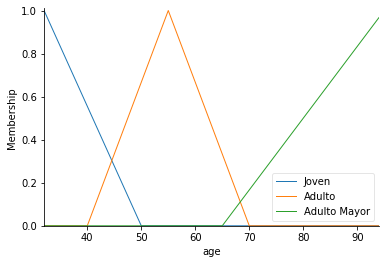

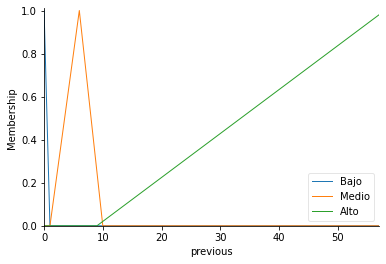

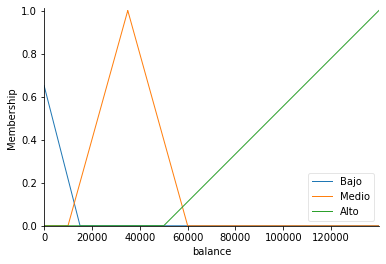

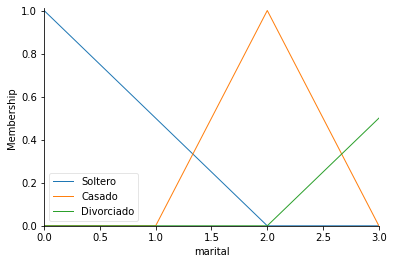

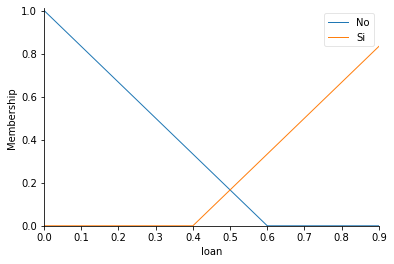

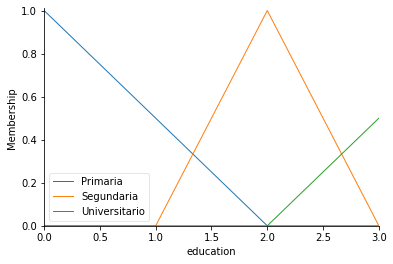

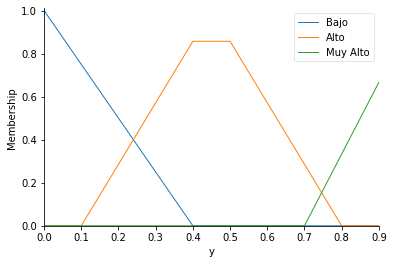

In [19]:
age.view()
previous.view()
balance.view()
marital.view()
loan.view()
education.view()
y.view()

Creacion de las **reglas fuzzy** analizadas para nuestro ejercicio

In [49]:
rule1 = ctrl.Rule(age['Joven'] & previous['Alto'] & balance['Alto'] & marital['Soltero'] & loan['No'] & education['Universitario'], y['Muy Alto'])
rule2 = ctrl.Rule(age['Adulto'] & previous['Alto'] & balance['Alto'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Muy Alto'])
rule3 = ctrl.Rule(age['Joven'] & previous['Alto'] & balance['Alto'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Muy Alto'])
rule4 = ctrl.Rule(age['Joven'] & previous['Alto'] & balance['Alto'] & marital['Soltero'] & loan['Si'] & education['Universitario'], y['Alto'])
rule5 = ctrl.Rule(age['Adulto'] & previous['Medio'] & balance['Alto'] & marital['Divorciado'] & loan['No'] & education['Segundaria'], y['Alto'])
rule6 = ctrl.Rule(age['Adulto'] & previous['Medio'] & balance['Alto'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Alto'])
rule7 = ctrl.Rule(age['Joven'] & previous['Medio'] & balance['Medio'] & marital['Soltero'] & loan['No'] & education['Universitario'], y['Alto'])
rule8 = ctrl.Rule(age['Joven'] & previous['Medio'] & balance['Bajo'] & marital['Soltero'] & loan['No'] & education['Segundaria'], y['Bajo'])
rule9 = ctrl.Rule(age['Adulto'] & previous['Bajo'] & balance['Bajo'] & marital['Divorciado'] & loan['Si'] & education['Segundaria'], y['Bajo'])
rule10 = ctrl.Rule(age['Joven'] & previous['Bajo'] & balance['Bajo'] & marital['Soltero'] & loan['Si'] & education['Primaria'], y['Bajo'])
rule11 = ctrl.Rule(age['Adulto Mayor'] & previous['Medio'] & balance['Bajo'] & marital['Casado'] & loan['Si'] & education['Segundaria'], y['Bajo'])
rule12 = ctrl.Rule(age['Adulto Mayor'] & previous['Medio'] & balance['Medio'] & marital['Casado'] & loan['No'] & education['Segundaria'], y['Alto'])
rule13 = ctrl.Rule(age['Adulto Mayor'] & previous['Medio'] & balance['Alto'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Muy Alto'])
rule14 = ctrl.Rule(age['Adulto Mayor'] & previous['Alto'] & balance['Alto'] & marital['Divorciado'] & loan['No'] & education['Universitario'], y['Alto'])
rule15 = ctrl.Rule(age['Adulto'] & previous['Bajo'] & balance['Medio'] & marital['Soltero'] & loan['No'] & education['Universitario'], y['Alto'])
rule16 = ctrl.Rule(age['Joven'] & previous['Bajo'] & balance['Medio'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Alto'])
rule17 = ctrl.Rule(age['Adulto'] & previous['Bajo'] & balance['Bajo'] & marital['Soltero'] & loan['No'] & education['Universitario'], y['Alto'])

In [20]:
rule1 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'], y['Bajo'])
rule2 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'], y['Bajo'])
rule3 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'], y['Bajo'])
rule4 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'], y['Alto'])
rule5 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'], y['Alto'])
rule6 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'], y['Muy Alto'])
rule7 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'], y['Alto'])
rule8 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'], y['Muy Alto'])
rule9 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'], y['Muy Alto'])
rule10 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'], y['Bajo'])
rule11 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'], y['Bajo'])
rule12 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'], y['Bajo'])
rule13 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'], y['Bajo'])
rule14 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'], y['Bajo'])
rule15 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'], y['Bajo'])
rule16 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'], y['Alto'])
rule17 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'], y['Alto'])
rule18 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'], y['Alto'])

Agregamos las reglas a nuestro algoritmo

In [50]:
#validate_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18])
validate_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17])
validate_simulator = ctrl.ControlSystemSimulation(validate_ctrl)

Ejecutamos la regla con el 1 registro del dataframe

Funciones de conversion de variables a numericas acorde al rango

In [26]:
def randomBetweenMarital(marital):
  a,b=0,0
  if marital == 'single':
    a,b=0,2
  elif marital=='married':
    a,b=1,3
  else:
    a,b=2,4
  return a+random.random()*(b-a) 

In [27]:
def randomBetweenLoan(loan):
  a,b=0,0
  if loan == 'no':
    a,b=0,0.6
  else:
    a,b=0.4,1
  return a+random.random()*(b-a) 

In [28]:
def randomBetweenEducation(edication):
  a,b=0,0
  if edication == 'primary':
    a,b=0,2
  elif edication=='secondary':
    a,b=1,3
  else:
    a,b=2,4
  return a+random.random()*(b-a) 

In [44]:
randomBetweenEducation(df_bank.head(1).education[0])

3.839648133634359

In [ ]:
#58,2143,0.31,0,1.7,3.8

In [53]:
validate_simulator.input['age']=df_bank.head(1).age[0]#58
validate_simulator.input['balance']=df_bank.head(1).balance[0]#
validate_simulator.input['loan']=randomBetweenLoan(df_bank.head(1).loan[0])
validate_simulator.input['previous']=df_bank.head(1).previous[0]
validate_simulator.input['marital']=randomBetweenMarital(df_bank.head(1).marital[0])
validate_simulator.input['education']=randomBetweenEducation(df_bank.head(1).education[0])

In [51]:
validate_simulator.input['age']=58
validate_simulator.input['balance']=2143
validate_simulator.input['loan']=0.3
validate_simulator.input['previous']=0
validate_simulator.input['marital']=1.7
validate_simulator.input['education']=3.8

Revisamos el resultado del algoritmo Fuzzy

In [54]:
validate_simulator.compute()
print(validate_simulator.output['y'])

0.45000000000000007


Graficamos el resultado

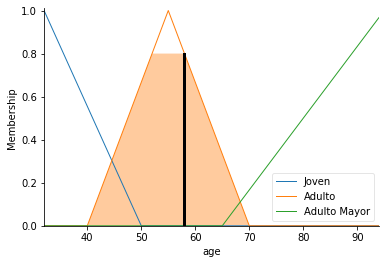

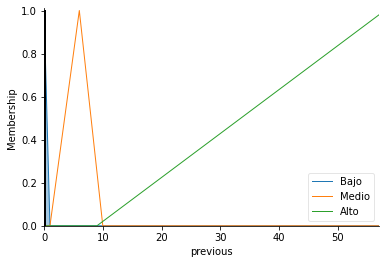

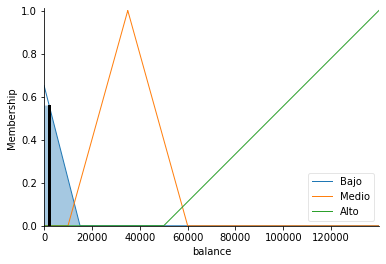

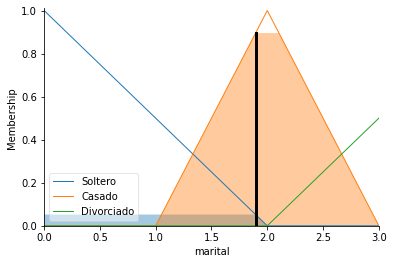

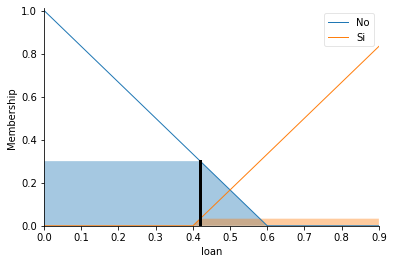

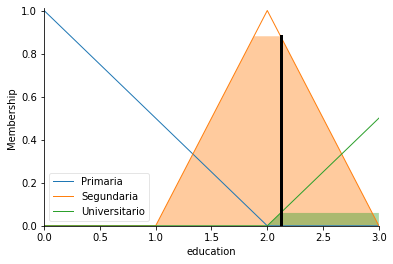

In [55]:
age.view(sim=validate_simulator)
previous.view(sim=validate_simulator)
balance.view(sim=validate_simulator)
marital.view(sim=validate_simulator)
loan.view(sim=validate_simulator)
education.view(sim=validate_simulator)


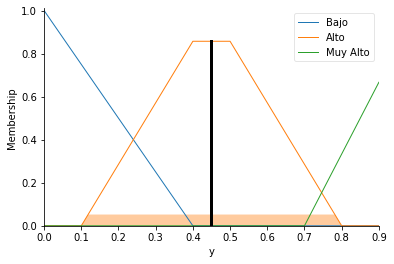

In [56]:
y.view(sim=validate_simulator)

Ejecutar hasta aqui

In [ ]:
error

**Variables Nominales**


*   Job
*   marital
*   Default (1 Solo Valor)
*   housing (1 Solo Valor)
*   loan (1 Solo Valor)
*   contact 
*   poutcome
*   y (1 Solo Valor)


**Variables Desccartadas**

*   duration	(Varible que tiene una alta relacion con la campaña por lo cual nos puede sobre ajustar el modelo, pues indica tiempo de duracion de la llamada y es 0 cuando no ha sido contacto). 

**Variables Ordinales**

*   education
*   month





In [ ]:
df_bank.info()

In [ ]:
df_bank.month.value_counts()

In [ ]:
df_bank.campaign.value_counts()

In [ ]:
df_bank.job.value_counts()

Creamos Data Frame para preparlo

In [ ]:
df_piv=df_bank.copy()

Convertimos varibales nominales 

In [ ]:
df_piv=pd.get_dummies(df_piv,columns=['job','marital','poutcome'])

In [ ]:
df_piv

In [ ]:
df_piv=pd.get_dummies(df_piv,columns=['default','housing','loan','contact','y'],drop_first = True)

In [ ]:
df_piv

In [ ]:
df_bank.columns

In [ ]:
df_piv.columns

In [ ]:
df_piv[['y_yes']].value_counts()

In [ ]:
df_piv.info()

Eliminamos columna duration

In [ ]:
df_piv.drop(['duration'],axis=1,inplace=True)

In [ ]:
df_piv.info()

Convertimos variables Ordinales

In [ ]:
df_bank.education.value_counts()

In [ ]:
df_piv.education

In [ ]:
# Variable education 
education_orden=OrdinalEncoder(categories=[["unknown","primary","secondary","tertiary"]])
#Train la conversion
education_orden.fit(df_piv[['education']])
#Agregar variable convertida
df_piv['education_orden']=education_orden.transform(df_piv[['education']])

In [ ]:
df_piv.columns

In [ ]:
df_piv[['education','education_orden']].head(10)

In [ ]:
df_bank.month.value_counts()

In [ ]:
# Variable Month 
month_orden=OrdinalEncoder(categories=[["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]])
#Train la conversion
month_orden.fit(df_piv[['month']])
#Agregar variable convertida
df_piv['month_orden']=month_orden.transform(df_piv[['month']])

In [ ]:
df_piv.columns

In [ ]:
df_piv[['month','month_orden']].head(10)

borramos variables ordinales puras

In [ ]:
df_piv.drop(['month','education'],axis=1,inplace=True)

In [ ]:
df_piv.columns

In [ ]:
df_bank.job.value_counts()

In [ ]:
df_piv[['y_yes']]

In [ ]:
df_piv.head(3)

Entrenamiento de red neuronal

> Bloc con sangría



In [ ]:
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn import metrics

In [ ]:
df_piv_no_classes = df_piv.drop(columns='y_yes').copy()
df_piv_no_classes.head()

In [ ]:
df_piv_no_classes.columns

In [ ]:
a=df_piv.hist(figsize=(20, 15))

In [ ]:
#d = pd.plotting.scatter_matrix(df_piv, c=df_piv.y_yes, cmap='Set1', figsize=(15, 15))

Creamos la variable etiqueta

In [ ]:
y = df_piv[['y_yes']].values[:,0]
y.shape

In [ ]:
y[0:2]

In [ ]:
y

In [ ]:
x=df_piv_no_classes.values
x.shape

In [ ]:
x[0]

In [ ]:
df_piv_no_classes.head(1)

In [ ]:
x[0]

In [ ]:
np.mean(x)

In [ ]:
np.std(x)

In [ ]:
class_names = ['no','yes']

**Tratando el desbalanceo**

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

Combinamos resampling con Smote-Tomek

In [ ]:
smote_tomek = SMOTETomek(random_state=12)
X_train_smt, y_train_smt = smote_tomek.fit_resample(x,y)
 
print ("Distribucion Original {}".format(Counter(y)))
print ("Distribution despues smote-Tomek {}".format(Counter(y_train_smt)))

In [ ]:
X_trainPF, X_testPF, y_trainPF, y_testPF = train_test_split(X_train_smt, y_train_smt, test_size=0.3, random_state=1, stratify=y_train_smt)
pl.hist(y_trainPF, label="Train")
pl.hist(y_testPF, label="Test")
pl.legend()
pl.title("Distribucion")
pl.show()

**Modelo  con redes Neuronales**

In [ ]:
mlp_PRO_FLA = MLPClassifier(solver='lbfgs', max_iter=200,random_state=1,hidden_layer_sizes=(2,1))
mlp_PRO_FLA.fit(X_trainPF, y_trainPF)
prediction_testAM = mlp_PRO_FLA.predict(X_testPF)
cnf_matrixAM = confusion_matrix(y_testPF, prediction_testAM)
list_cm(cnf_matrixAM,class_names)
print('SCORE entrenamiento: {}'.format(mlp_PRO_FLA.score(X_trainPF, y_trainPF)))
print('Error en entrenamiento: {}'.format(1-mlp_PRO_FLA.score(X_trainPF, y_trainPF)))
print('SCORE prueba: {}'.format(mlp_PRO_FLA.score(X_testPF, y_testPF)))
print('Error en prueba: {}'.format(1-mlp_PRO_FLA.score(X_testPF, y_testPF)))
sensibilidad=recall_score(y_testPF,prediction_testAM)
print("Sensibilidad: {}".format(sensibilidad))

**Estandarizacion de datos**

In [ ]:
x.shape

Datos sin estandarizar

In [ ]:
print(np.mean(X_train_smt)) 
print(np.std(X_train_smt))

Datos estandarizados

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(X_train_smt)
X_scaler = sc_x.transform(X_train_smt)
print(np.mean(X_scaler)) 
print(np.std(X_scaler))

In [ ]:
X_trainPF, X_testPF, y_trainPF, y_testPF = train_test_split(X_scaler, y_train_smt, test_size=0.3, random_state=123, stratify=y_train_smt)
pl.hist(y_trainPF, label="Train")
pl.hist(y_testPF, label="Test")
pl.legend()
pl.title("Distribucion")
pl.show()

Modelo

In [ ]:
mlp_PRO_FLA = MLPClassifier(solver='lbfgs', max_iter=200,random_state=1,hidden_layer_sizes=(2,1))
mlp_PRO_FLA.fit(X_trainPF, y_trainPF)
prediction_testAM = mlp_PRO_FLA.predict(X_testPF)
cnf_matrixAM = confusion_matrix(y_testPF, prediction_testAM)
list_cm(cnf_matrixAM,class_names)
print('SCORE entrenamiento: {}'.format(mlp_PRO_FLA.score(X_trainPF, y_trainPF)))
print('Error en entrenamiento: {}'.format(1-mlp_PRO_FLA.score(X_trainPF, y_trainPF)))
print('SCORE prueba: {}'.format(mlp_PRO_FLA.score(X_testPF, y_testPF)))
print('Error en prueba: {}'.format(1-mlp_PRO_FLA.score(X_testPF, y_testPF)))
sensibilidad=recall_score(y_testPF,prediction_testAM)
print("Sensibilidad: {}".format(sensibilidad))

Importnacia de variables

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=128, max_features=.4)
clf.fit(X_trainPF, y_trainPF);

In [ ]:
prediction_testAM = clf.predict(X_testPF)
cnf_matrixAM = confusion_matrix(y_testPF, prediction_testAM)
list_cm(cnf_matrixAM,class_names)
print('SCORE entrenamiento: {}'.format(clf.score(X_trainPF, y_trainPF)))
print('Error en entrenamiento: {}'.format(1-clf.score(X_trainPF, y_trainPF)))
print('SCORE prueba: {}'.format(clf.score(X_testPF, y_testPF)))
print('Error en prueba: {}'.format(1-clf.score(X_testPF, y_testPF)))
sensibilidad=recall_score(y_testPF,prediction_testAM)
print("Sensibilidad: {}".format(sensibilidad))

In [ ]:
clf.feature_importances_

In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Importancia de características:")

for f in range(X_trainPF.shape[1]):
    print("Característica %s (%f)" % (df_piv_no_classes.columns[int(indices[f])], importances[indices[f]]))

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Importancia de las características")
plt.bar(range(X_trainPF.shape[1]), importances[indices],
       color="r", align="center")
xticks_labels = [df_piv_no_classes.columns[i] for i in indices]
plt.xticks(range(X_scaler.shape[1]), xticks_labels, rotation=45)
plt.xlim([-1, df_piv_no_classes.shape[1]])
plt.show()

**Uso de algoritmo Genetico**

Instalacion de libreria

In [ ]:
!pip install pygad

In [ ]:
import pygad
import pygad.nn
import pygad.gann
print(pygad.__version__)

In [ ]:
X_trainPF, X_testPF, y_trainPF, y_testPF = train_test_split(X_scaler, y_train_smt, test_size=0.3, random_state=123, stratify=y_train_smt)
pl.hist(y_trainPF, label="Train")
pl.hist(y_testPF, label="Test")
pl.legend()
pl.title("Distribucion")
pl.show()

In [ ]:
num_inputs = X_scaler.shape[1]
num_classes = 2
num_solutions = 20

In [ ]:
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=32,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=num_classes,
                                hidden_activations=["relu"],
                                output_activation="softmax")

In [ ]:
def fitness_func(solution, sol_idx):
    print("----------------inicio --------------------------------------------------")
    global GANN_instance,best_solution_fitness,best_solution,best_sensibility,cnf_matrixAM
    print("solution"+str(solution))
    result = np.where(solution == 0)
    x_train=X_trainPF.copy()
    x_train=np.delete(x_train, result,axis=1)
    x_test=X_testPF.copy()
    x_test=np.delete(x_test, result,axis=1)
    GANN_instance = pygad.gann.GANN(num_solutions=300,
                                num_neurons_input=x_train.shape[1],
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="softmax")
    train=pygad.nn.train(last_layer=GANN_instance.population_networks[sol_idx],data_inputs=x_train,
                         data_outputs=y_trainPF,num_epochs=4)
    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],data_inputs=x_test)
    solution_fitness=metrics.accuracy_score(y_testPF,predictions)
    sensibilidad=recall_score(y_testPF,predictions)
    if(best_solution_fitness!=0):
      if(best_solution_fitness<solution_fitness):
        best_solution_fitness=solution_fitness
        best_solution=solution
        best_sensibility=sensibilidad
        cnf_matrixAM = confusion_matrix(y_testPF, predictions)
    else:
       best_solution_fitness=solution_fitness
        best_solution=solution
        best_sensibility=sensibilidad
        cnf_matrixAM = confusion_matrix(y_testPF, predictions)
    print("SCORE: {}".format(solution_fitness))
    print("Sensibilidad: {}".format(sensibilidad))
    print("----------------Fin --------------------------------------------------")
    return solution_fitness

In [ ]:
a=np.ones(64,int)
a[31]=1
a[63]=1

In [ ]:
a.reshape(2,32).shape

In [ ]:
a.reshape(2,32)

In [ ]:
num_parents_mating = 2
num_generations = 20
mutation_percent_genes = 40
parent_selection_type = "rank"
crossover_type = "uniform"
mutation_type = "random" 
keep_parents = 1
init_range_low = -2
init_range_high = 5

In [ ]:
ga_instance = pygad.GA(num_generations=num_generations, 
                       mutation_num_genes=20,
                       num_parents_mating=num_parents_mating, 
                       initial_population=a.reshape(2,32),
                       fitness_func=fitness_func,
                       gene_type=int,
                       gene_space=[0,1],
                       mutation_percent_genes=mutation_percent_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       save_solutions=True)

In [ ]:
best_solution=0
best_solution_fitness=0
best_sensibility=0
cnf_matrixAM=0
prediction_testAM=0
ga_instance.run()

In [ ]:
def scoring_PG():
  global best_solution_fitness,best_solution,best_sensibility,cnf_matrixAM
  print("best_fitness:"+str(best_solution_fitness))
  print("\n")
  print("best_sensibility:"+str(best_sensibility))
  print("\n")
  print("best_solution "+str(best_solution))
  print("\n")
  result = np.where(best_solution == 1)
  print("Columns: "+str(df_piv_no_classes.columns[result]))
  print("\n")
  list_cm(cnf_matrixAM,class_names)
scoring_PG()

In [ ]:
ga_instance.plot_fitness()

In [ ]:
ga_instance.plot_genes()

# **Curva AUC**

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
global prediction_testAM
auc = roc_auc_score(y_testPF,prediction_testAM)
text="ROC AUC=%.3f"% (auc)
print(text)
print('Red Neuronal: ROC AUC=%.3f' % (auc))

In [ ]:
def plot_roc_curve(fper, tper,auc):
    plt.plot(fper, tper, color='red', label='ROC',)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.text(0.45, 0.8, auc, fontsize=9, color='red')
    plt.show()

In [ ]:
global prediction_testAM
fper, tper, thresholds = roc_curve(y_testPF,prediction_testAM)
plot_roc_curve(fper, tper,text)